# Data Manipulation with Pandas

In [1]:
import numpy as np
import pandas as pd

## The Pandas Series Object

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### `Series` as generalized NumPy array

In [7]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
data['b']

0.5

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as specialized dictionary

In [10]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [11]:
population['California']

38332521

In [12]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

#### General form:

`pd.Series(data, index=index)`

where `index` is an optional argument,<br>
and `data` can be one of many entities.

In [13]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [14]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [15]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

In [17]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [18]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

In [19]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [20]:
states.columns

Index(['population', 'area'], dtype='object')

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. 

In [21]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Notice the potential point of confusion here: 
- in a two-dimesnional NumPy array, data[0] will return the first row.
- For a DataFrame, data['col0'] will return the first column.

## Constructing DataFrame objects

### From a single Series object

In [22]:
pd.DataFrame(population, columns=['population'])

population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135

### From a list of dicts

In [23]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

a  b
0  0  0
1  1  2
2  2  4

#### Missing data

In [24]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

a  b    c
0  1.0  2  NaN
1  NaN  3  4.0

### From a dictionary of Series objects

In [25]:
pd.DataFrame({'population': population,
              'area': area})

population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995

### From a two-dimensional NumPy array

In [26]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

foo       bar
a  0.827941  0.950668
b  0.002493  0.064868
c  0.231853  0.587073

## `DataFrame` functionality

#### Using the famous Titanic data for analysis and exploration. 

https://www.kaggle.com/c/titanic/data

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("data/train.csv")

In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

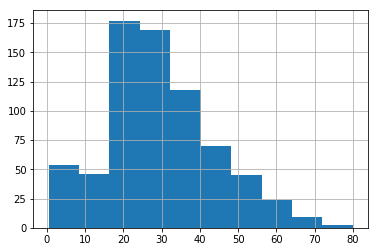

In [32]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [37]:
df.groupby('Sex')[['Survived']].mean()

Survived
Sex             
female  0.742038
male    0.188908

**Or how does it differ between the different classes?**

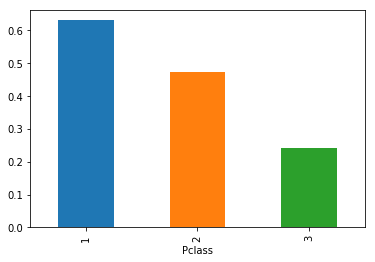

In [38]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

**Are young people more likely to survive?**

In [39]:
df['Survived'].mean()

0.3838383838383838

In [40]:
df25 = df[df['Age'] <= 25]
df25['Survived'].mean()

0.4119601328903654

#### How many people did survive?

In [41]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### How many children below 5 years of age were on board the ship?

In [42]:
below_5 = df[df.Age <= 5]
len(below_5) 

44

#### How many of those children survived?

In [43]:
below_5['Survived'].value_counts()
 

1    31
0    13
Name: Survived, dtype: int64

#### How many embark points were there?

In [44]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

#### Choosing multiple columns

In [45]:
df[['Survived','Age']].head()

Survived   Age
0         0  22.0
1         1  38.0
2         1  26.0
3         1  35.0
4         0  35.0

#### Applying multiple filtering criteria

#### Only Age, Sex and Pclass of children who have survived

#### Combining multiple filtering and slicing to dataframes simulteneously

In [46]:
df[(df.Survived == 1) & (df.Age <= 5)] \
          [['Age', 'Sex', 'Pclass']][0:5]

Age     Sex  Pclass
10   4.00  female       3
43   3.00  female       2
58   5.00  female       2
78   0.83    male       2
172  1.00  female       3

#### Some general information

In [47]:
df.shape

(891, 12)

In [48]:
df.dtypes # see datatype of each variable

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df.nunique() # unique value for each variable

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
